In [1]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [2]:
train_df.shape
test_df.shape

(7900, 14)

# Data PreProcessing

In [3]:
# Numerical data types
numerical_df = train_df.select_dtypes(include=['int64', 'float64'])
print("Numerical Data Types:")
print(numerical_df.dtypes)

# Categorical data types
categorical_df = train_df.select_dtypes(include=['object'])
print("\nCategorical Data Types:")
print(categorical_df.dtypes)


Numerical Data Types:
Property_Area               int64
Number_of_Windows         float64
Number_of_Doors             int64
Frequency_of_Powercuts    float64
Traffic_Density_Score     float64
Air_Quality_Index         float64
Neighborhood_Review       float64
Habitability_score        float64
dtype: object

Categorical Data Types:
Id                object
Property_Type     object
Furnishing        object
Power_Backup      object
Water_Supply      object
Crime_Rate        object
Dust_and_Noise    object
dtype: object


In [4]:
train_df.drop('Id', axis=1, inplace=True)
ID_Col = test_df['Id']
test_df.drop('Id', axis=1, inplace=True)

for column in train_df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}:")
    print(train_df[column].value_counts())
    print()

Unique values in Property_Type:
Property_Type
Apartment             11673
Single-family home     9146
Duplex                 4671
Bungalow               3392
Container Home         2310
#R%$G&867               407
Name: count, dtype: int64

Unique values in Furnishing:
Furnishing
Semi_Furnished     16314
Unfurnished         8279
Fully Furnished     6178
Name: count, dtype: int64

Unique values in Power_Backup:
Power_Backup
No               23796
Yes               7124
NOT MENTIONED      679
Name: count, dtype: int64

Unique values in Water_Supply:
Water_Supply
All time                   15585
Once in a day - Morning     7887
Once in a day - Evening     6300
Once in two days            1569
NOT MENTIONED                258
Name: count, dtype: int64

Unique values in Crime_Rate:
Crime_Rate
Well below average        15533
Slightly below average     9334
Slightly above average     4216
Well above average         1887
Name: count, dtype: int64

Unique values in Dust_and_Noise:
Dust_and_Nois

In [5]:
missing_values = train_df.isnull().sum()
print("Missing Values in Train Dataset:")
print(missing_values)

missing_values_test = test_df.isnull().sum()
print("Missing Values in Test Dataset:")
print(missing_values_test)

Missing Values in Train Dataset:
Property_Type                0
Property_Area                0
Number_of_Windows         1333
Number_of_Doors              0
Furnishing                 828
Frequency_of_Powercuts    1109
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 629
Dust_and_Noise             999
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64
Missing Values in Test Dataset:
Property_Type               0
Property_Area               0
Number_of_Windows         321
Number_of_Doors             0
Furnishing                214
Frequency_of_Powercuts    274
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                158
Dust_and_Noise            220
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64


<Axes: ylabel='Frequency'>

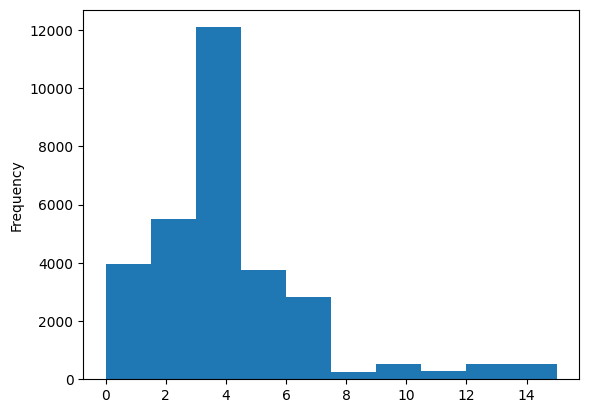

In [6]:
train_df['Number_of_Windows'].plot(kind='hist')

<Axes: xlabel='Furnishing'>

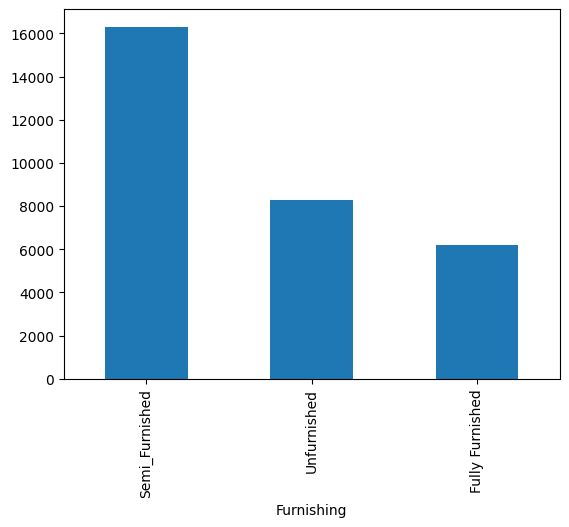

In [7]:
train_df['Furnishing'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

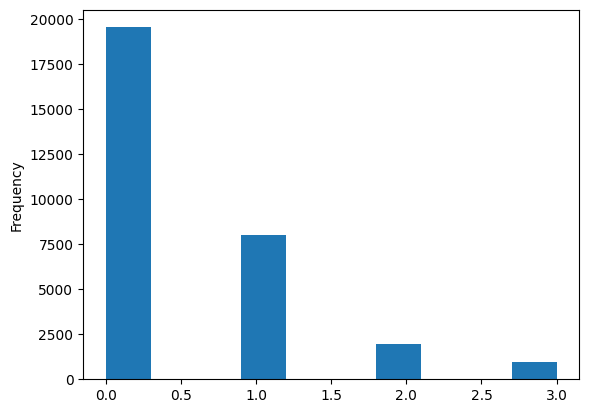

In [8]:
train_df['Frequency_of_Powercuts'].plot(kind='hist')

<Axes: xlabel='Crime_Rate'>

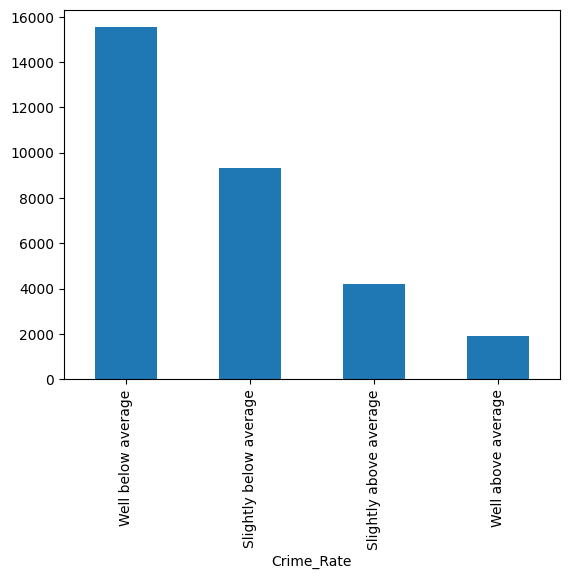

In [9]:
train_df['Crime_Rate'].value_counts().plot(kind='bar')

<Axes: xlabel='Dust_and_Noise'>

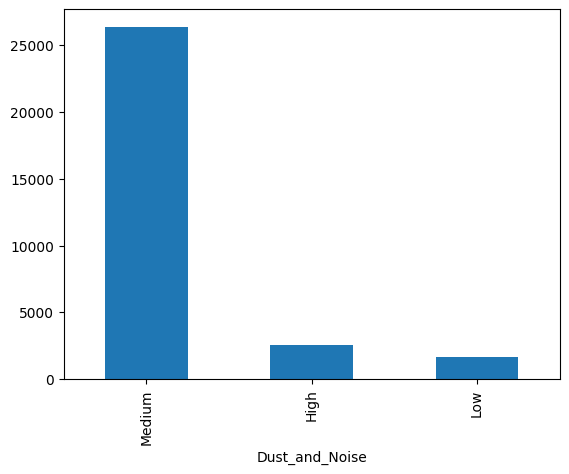

In [10]:
train_df['Dust_and_Noise'].value_counts().plot(kind='bar')

In [11]:
train_df['Number_of_Windows'] = train_df['Number_of_Windows'].fillna(train_df['Number_of_Windows'].median())
test_df['Number_of_Windows'] = test_df['Number_of_Windows'].fillna(train_df['Number_of_Windows'].median())

train_df['Furnishing'] = train_df['Furnishing'].fillna(train_df['Furnishing'].mode()[0])
test_df['Furnishing'] = test_df['Furnishing'].fillna(train_df['Furnishing'].mode()[0])

train_df['Frequency_of_Powercuts'] = train_df['Frequency_of_Powercuts'].fillna(train_df['Frequency_of_Powercuts'].median())
test_df['Frequency_of_Powercuts'] = test_df['Frequency_of_Powercuts'].fillna(train_df['Frequency_of_Powercuts'].median())

train_df['Crime_Rate'] = train_df['Crime_Rate'].fillna(train_df['Crime_Rate'].mode()[0])
test_df['Crime_Rate'] = test_df['Crime_Rate'].fillna(train_df['Crime_Rate'].mode()[0])

train_df['Dust_and_Noise'] = train_df['Dust_and_Noise'].fillna(train_df['Dust_and_Noise'].mode()[0])
test_df['Dust_and_Noise'] = test_df['Dust_and_Noise'].fillna(train_df['Dust_and_Noise'].mode()[0])

In [12]:
missing_values_train = train_df.isnull().sum()
missing_values_train = missing_values_train[missing_values_train > 0]
print("Missing Values in Train Dataset:")
print(missing_values_train)

missing_values_test = test_df.isnull().sum()
missing_values_test = missing_values_test[missing_values_test > 0]
print("\nMissing Values in Test Dataset:")
print(missing_values_test)

Missing Values in Train Dataset:
Series([], dtype: int64)

Missing Values in Test Dataset:
Series([], dtype: int64)


In [13]:
furnishing_mapping = {'Fully Furnished': 3, 'Semi_Furnished': 2, 'Unfurnished': 1}

train_df['Furnishing'] = train_df['Furnishing'].map(furnishing_mapping)
test_df['Furnishing'] = test_df['Furnishing'].map(furnishing_mapping)

In [14]:
train_df['Power_Backup'] = (train_df['Power_Backup'] == 'Yes').astype(int)
test_df['Power_Backup'] = (test_df['Power_Backup'] == 'Yes').astype(int)

In [15]:
crime_rate_mapping = {'Well below average': 1, 'Slightly below average': 2, 'Slightly above average': 3, 'Well above average': 4}

train_df['Crime_Rate'] = train_df['Crime_Rate'].map(crime_rate_mapping)
test_df['Crime_Rate'] = test_df['Crime_Rate'].map(crime_rate_mapping)

In [16]:
dns_mapping = {'Low': 1, 'Medium': 2, 'High': 3 }

train_df['Dust_and_Noise'] = train_df['Dust_and_Noise'].map(dns_mapping)
test_df['Dust_and_Noise'] = test_df['Dust_and_Noise'].map(dns_mapping)

In [17]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Water_Supply'], prefix='Water_Supply')], axis=1)
train_df.drop('Water_Supply', axis=1, inplace=True)
train_df.drop('Water_Supply_NOT MENTIONED', axis=1, inplace=True)

test_df = pd.concat([test_df, pd.get_dummies(test_df['Water_Supply'], prefix='Water_Supply')], axis=1)
test_df.drop('Water_Supply', axis=1, inplace=True)
test_df.drop('Water_Supply_NOT MENTIONED', axis=1, inplace=True)

In [18]:
train_df = pd.concat([train_df, pd.get_dummies(train_df['Property_Type'], prefix='Property_Type')], axis=1)
train_df.drop('Property_Type', axis=1, inplace=True)
train_df.drop('Property_Type_#R%$G&867', axis=1, inplace=True)
test_df = pd.concat([test_df, pd.get_dummies(test_df['Property_Type'], prefix='Property_Type')], axis=1)
test_df.drop('Property_Type', axis=1, inplace=True)
test_df.drop('Property_Type_#R%$G&867', axis=1, inplace=True)

In [19]:
# train_df.head()

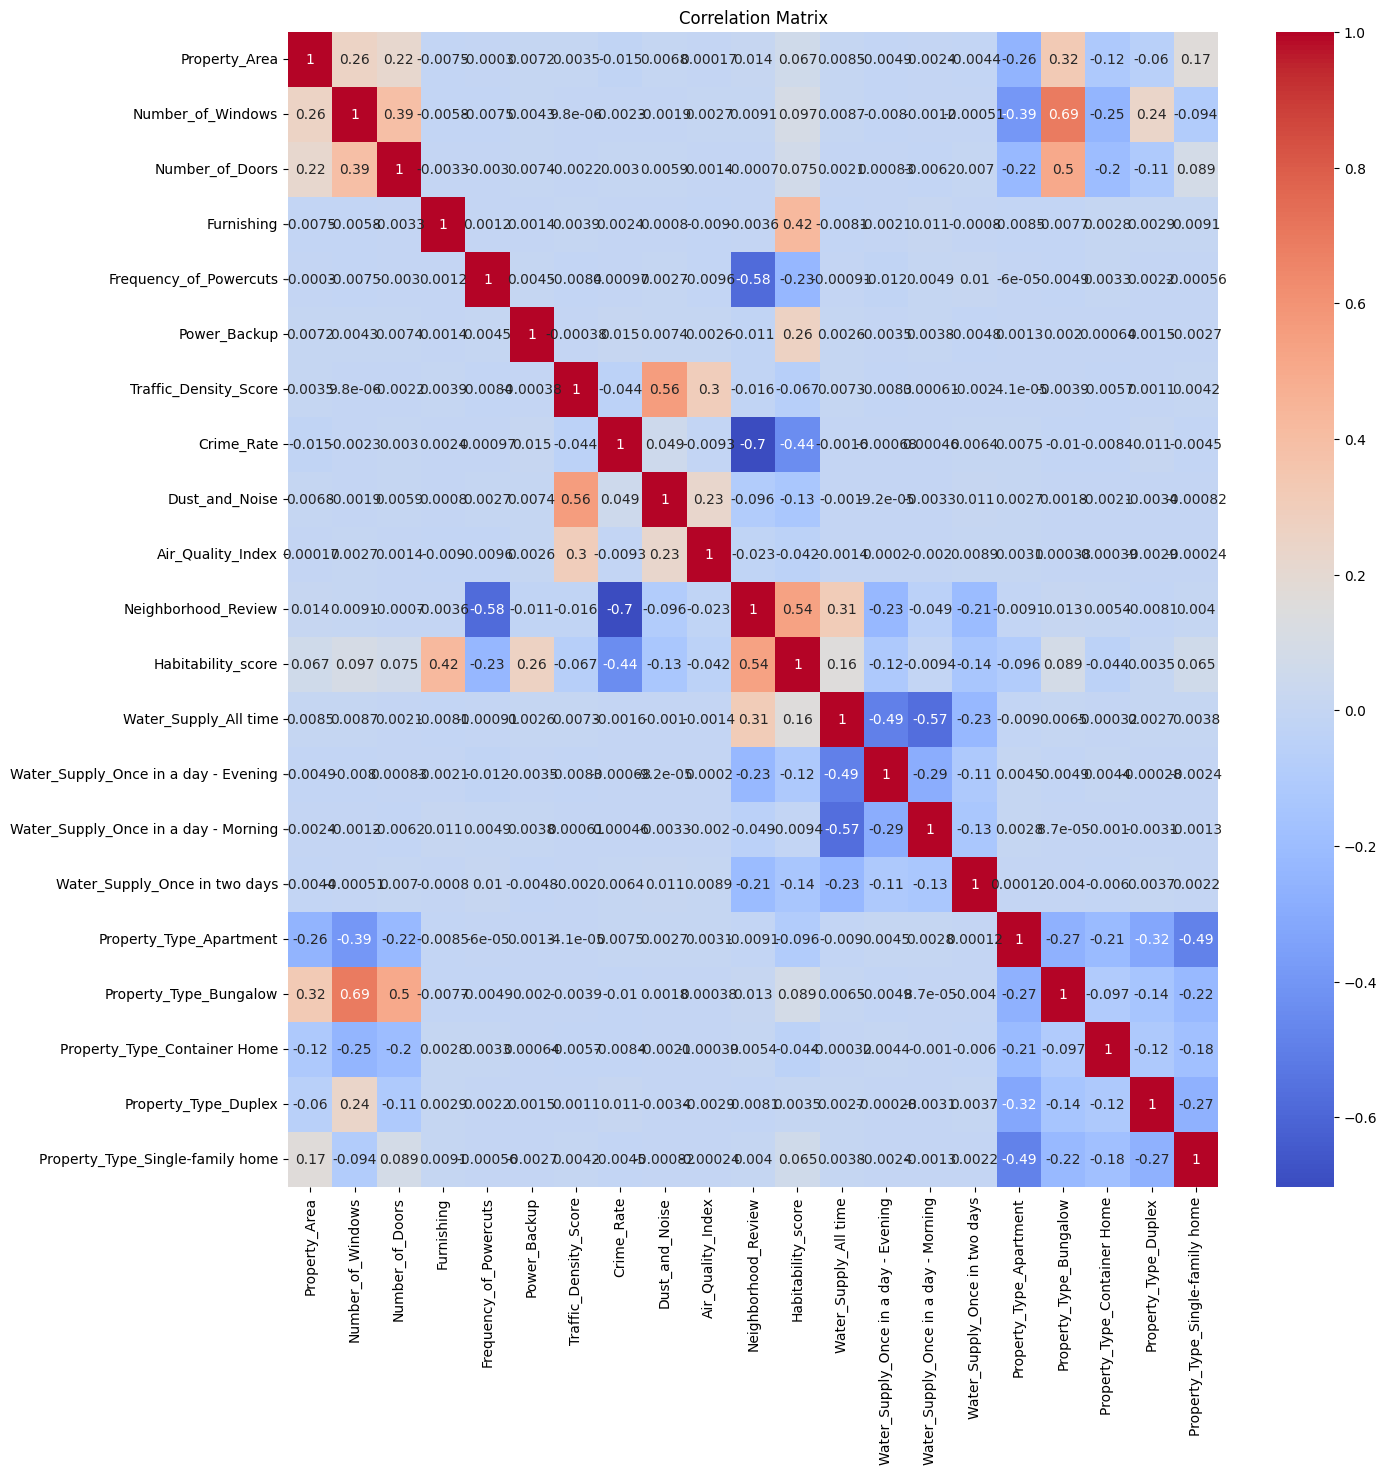

In [20]:
import seaborn as sns
correlation_matrix = train_df.corr()
# print(correlation_matrix)
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

X = train_df.drop('Habitability_score', axis=1)
y = train_df['Habitability_score']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training - Linear Regression

In [22]:
# Linear Regression
from sklearn.linear_model import LinearRegression


# Create the linear regression model
model_LA = LinearRegression()

# Fit the model to the training data
model_LA.fit(X_train, y_train)

# Predict the habitability score for the validation data
y_pred_LA = model_LA.predict(X_valid)

# Calculate the root mean square error
rmse_LA = root_mean_squared_error(y_valid, y_pred_LA)
rmse_LA

9.077188340570297

### With Scaled Columns ... No significant Change in the RMSE

In [23]:
# from sklearn.preprocessing import StandardScaler

# X = train_df.drop('Habitability_score', axis=1)
# y = train_df['Habitability_score']


# # Create a StandardScaler object
# scaler = StandardScaler()

# # Scale the attributes of the train dataset
# X_scaled = scaler.fit_transform(X)

# X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # Create the linear regression model
# model = LinearRegression()

# # Fit the model to the training data
# model.fit(X_train, y_train)

# # Predict the habitability score for the validation data
# y_pred = model.predict(X_valid)

# # Calculate the root mean square error
# rmse = root_mean_squared_error(y_valid, y_pred)
# rmse

# Hyperparameter Tuning - Random Forest Regression

In [24]:
# # Random Forest Regressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Create the Random Forest Regressor model
# model_RF = RandomForestRegressor()

# # Create the GridSearchCV object
# grid_search_RF = GridSearchCV(estimator=model_RF, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# # Fit the GridSearchCV object to the training data
# grid_search_RF.fit(X_train, y_train)

# # Get the best model
# best_model_RF = grid_search_RF.best_estimator_

# # Predict the habitability score for the validation data using the best model
# y_pred_best_RF = best_model_RF.predict(X_valid)

# # Calculate the root mean square error using the best model
# rmse_best_RF = root_mean_squared_error(y_valid, y_pred_best_RF)

# # Print the best hyperparameters and the corresponding RMSE
# print("Best Hyperparameters:")
# print(grid_search_RF.best_params_)
# print("RMSE with Best Model:", rmse_best_RF)




## Best Model Random Forest Regression

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Define the best hyperparameters
best_params = {
    'n_estimators': 300,
    'max_depth': None,
    'min_samples_split': 10,
    'min_samples_leaf': 1
}

# Create the Random Forest Regressor model with the best hyperparameters
best_model_RF = RandomForestRegressor(**best_params)

# Fit the best model to the training data
best_model_RF.fit(X_train, y_train)

# Predict the habitability score for the validation data using the best model
y_pred_best_RF = best_model_RF.predict(X_valid)

# Calculate the root mean square error using the best model (assuming you have a function called root_mean_squared_error)
rmse_best_RF = root_mean_squared_error(y_valid, y_pred_best_RF)

# Print the best hyperparameters and the corresponding RMSE
print("Best Hyperparameters:")
print(best_params)
print("RMSE with Best Model:", rmse_best_RF)


Best Hyperparameters:
{'n_estimators': 300, 'max_depth': None, 'min_samples_split': 10, 'min_samples_leaf': 1}
RMSE with Best Model: 5.9368840379953145


# Model Training - Neural Networks

In [26]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# # Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=2)

# Tuning the hyperparameters of the neural network regressor
param_grid_mlp = {'hidden_layer_sizes':[(100, 100), (200, 200)], 'max_iter':[1000, 2000]}
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5)

grid_search_mlp.fit(X_train_scaled, y_train)

grid_search_mlp.best_params_

mlp_new = MLPRegressor(hidden_layer_sizes=grid_search_mlp.best_params_['hidden_layer_sizes'], max_iter=grid_search_mlp.best_params_['max_iter'], random_state=2)

mlp_new.fit(X_train_scaled, y_train)

Y_pred_mlp = mlp_new.predict(X_valid_scaled)

print(root_mean_squared_error(y_valid, Y_pred_mlp))

In [ ]:
print(mlp_new.get_params())


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming y_pred_LA, y_pred_best_RF, and Y_pred_mlp are already defined arrays
# and y_valid contains the actual (true) values for the validation set

# Calculate R-squared scores
r2_LA = r2_score(y_valid, y_pred_LA)
r2_RF = r2_score(y_valid, y_pred_best_RF)
r2_mlp = r2_score(y_valid, Y_pred_mlp)

# Calculate Mean Squared Errors
mse_LA = mean_squared_error(y_valid, y_pred_LA)
mse_RF = mean_squared_error(y_valid, y_pred_best_RF)
mse_mlp = mean_squared_error(y_valid, Y_pred_mlp)

# Calculate Mean Absolute Errors
mae_LA = mean_absolute_error(y_valid, y_pred_LA)
mae_RF = mean_absolute_error(y_valid, y_pred_best_RF)
mae_mlp = mean_absolute_error(y_valid, Y_pred_mlp)

# Print the results
print("R2 Score for Linear Regression:", r2_LA)
print("R2 Score for Random Forest:", r2_RF)
print("R2 Score for MLP:", r2_mlp)

print("Mean Squared Error for Linear Regression:", mse_LA)
print("Mean Squared Error for Random Forest:", mse_RF)
print("Mean Squared Error for MLP:", mse_mlp)

print("Mean Absolute Error for Linear Regression:", mae_LA)
print("Mean Absolute Error for Random Forest:", mae_RF)
print("Mean Absolute Error for MLP:", mae_mlp)

# Writing to the CSV with the best approach ... Random Forest Regression


In [ ]:
# import pandas as pd
# Predict the habitability scores for the test data
# test_df_scaled = scaler.transform(test_df)
test_scores = best_model_RF.predict(test_df)

# Print the habitability scores of the test data
print(test_scores)
# Create a DataFrame with ID_Col and test_scores
df = pd.DataFrame({'Id': ID_Col, 'Habitability_score': test_scores})

# Save the DataFrame to a CSV file
df.to_csv('test_scores.csv', index=False)